# Propagation Algorithm and `BFS` traversal

In [1]:
import networkx as nx

In [2]:
from traversal import BFS

---

### BFS test on a simple graph - STRONGLY CONNECTED COMPONENT

The real **health graph** we are going to consider (i.e. `Playable Health (v5)` contains a strongly connected component which constitute the greatest part of the connectivity paths in the graph.

This component is the main reason why any solution based on _Topological Sort_ and `find_all_cycles` function is not going to work.

Thus, we are going to create an artificial (small) Strongly connected component to validate the implementation of the **BFS traversal with Edge Coloring** algorithm solution.

In [3]:
from matplotlib import pyplot as plt

%matplotlib inline

In [4]:
G = nx.DiGraph()

In [5]:
G.add_edges_from(['AB', 'BC', 'BD', 'CA', 'CB', 'DA', 'DC'])

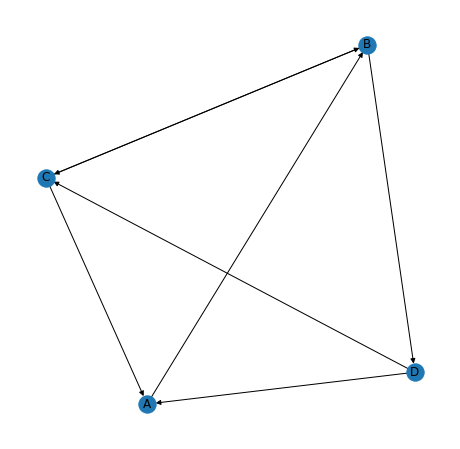

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
layout = nx.spring_layout(G)
nx.draw_networkx(G, ax=ax, with_labels=True, pos=layout)
ax.set_axis_off()

In [7]:
list(nx.strongly_connected_components(G))

[{'A', 'B', 'C', 'D'}]

In [8]:
bfs_scc = BFS(G)
for edge in bfs_scc('A'):
    print(edge)

('A', 'B')
('B', 'C')
('B', 'D')
('D', 'C')


### The `BFS` traversal correctly avoids to get stuck in the cycles of the SCC 👍🏻

---

## Propagation Algorithm

In [9]:
from propagation import propagate

### Controlled Test Graph

In [10]:
TEST_NODES = 'ABCDEMJKTW'
TEST_EDGES = ['AB', 'AE', 'ED', 'BC', 'CM', 'BD', 'DC', 'DJ',  'DK', 'TA', 'WJ']

In [11]:
G = nx.DiGraph()
G.add_nodes_from(TEST_NODES)

In [12]:
G.add_edges_from(TEST_EDGES)

In [13]:
nx.set_node_attributes(G, {n : {'activation': 1} for n in TEST_NODES})

In [14]:
G.nodes(data='activation')

NodeDataView({'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 1, 'M': 1, 'J': 1, 'K': 1, 'T': 1, 'W': 1}, data='activation')

In [15]:
nx.set_edge_attributes(G, {e : {'w': .5} for e in TEST_EDGES})

In [16]:
G.edges(data='w')

OutEdgeDataView([('A', 'B', 0.5), ('A', 'E', 0.5), ('B', 'C', 0.5), ('B', 'D', 0.5), ('C', 'M', 0.5), ('D', 'C', 0.5), ('D', 'J', 0.5), ('D', 'K', 0.5), ('E', 'D', 0.5), ('T', 'A', 0.5), ('W', 'J', 0.5)])

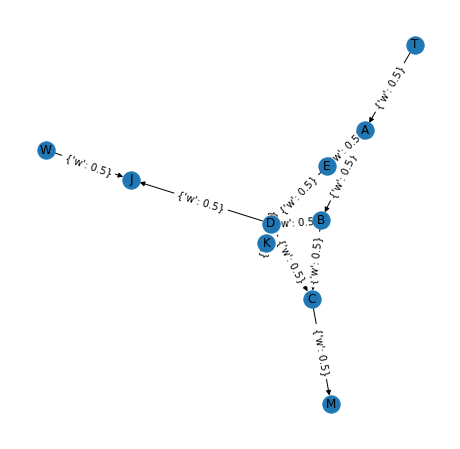

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
layout = nx.spectral_layout(G, weight='w')
nx.draw_networkx(G, ax=ax, with_labels=True, pos=layout)
nx.draw_networkx_edge_labels(G, ax=ax, pos=layout)
ax.set_axis_off()

### Introduce cycles in the graph

In [18]:
G['A']

AtlasView({'B': {'w': 0.5}, 'E': {'w': 0.5}})

In [19]:
G.add_edge('C', 'A')

In [20]:
G.add_edge('D', 'B')

In [21]:
G.add_edge('C', 'B')
G.add_edge('C', 'D')

In [22]:
list(G.edges())

[('A', 'B'),
 ('A', 'E'),
 ('B', 'C'),
 ('B', 'D'),
 ('C', 'M'),
 ('C', 'A'),
 ('C', 'B'),
 ('C', 'D'),
 ('D', 'C'),
 ('D', 'J'),
 ('D', 'K'),
 ('D', 'B'),
 ('E', 'D'),
 ('T', 'A'),
 ('W', 'J')]

#### Let's see how the graph now looks like. Those cycles will be likely avoided by the traversal

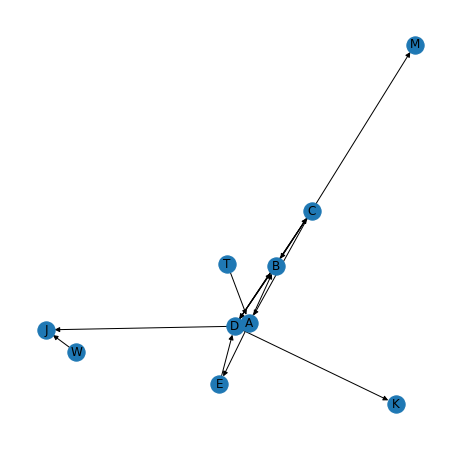

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
nx.draw_networkx(G, ax=ax, with_labels=True)
ax.set_axis_off()

#### BFS Traverse of  `G`

In [24]:
bfs_traverse = BFS(G)
for edge in bfs_traverse('A'):
    print(edge)

('A', 'E')
('A', 'B')
('E', 'D')
('B', 'C')
('B', 'D')
('D', 'J')
('D', 'K')
('D', 'C')
('C', 'M')


### Propagation inconsistency check

To verify that the BFS returns the edges in the correct order so that propagation correctly updates 
all the nodes, with no left-over or hanging further updates to already-finalised nodes.

In [25]:
def is_propagation_consistent(edges):
    edges = list(edges)
    for i, (u, v) in enumerate(edges):
        future_visits = edges[i+1:]
        for (_, t) in future_visits:
            if u == t:
                return False
    return True

In [26]:
is_propagation_consistent(iter(bfs_traverse('A')))

True

#### Propagation on `G` from node `A`

In [27]:
propagate(G, 'A', 10, edge_beta_key='w')

{'A': {'activation': 10},
 'B': {'activation': 5.0},
 'C': {'activation': 1.875},
 'D': {'activation': 2.5},
 'E': {'activation': 5.0},
 'M': {'activation': 0.9375},
 'J': {'activation': 1.25},
 'K': {'activation': 1.25},
 'T': {'activation': 1},
 'W': {'activation': 1}}

### DON'T RUN THE FOLLOWING CELL: 

OUTPUT kept **just for Cross-Check**!

This func-call is the output of the previous solution based on Topological Sort!

In [12]:
propagate(G, 'A', 10, edge_beta_key='w')

{'A': {'activation': 10},
 'B': {'activation': 5.0},
 'C': {'activation': 1.875},
 'D': {'activation': 2.5},
 'E': {'activation': 5.0},
 'M': {'activation': 0.9375},
 'J': {'activation': 1.25},
 'K': {'activation': 1.25},
 'T': {'activation': 1},
 'W': {'activation': 1}}

## If you do the counting manually, it seems to work! 🤘🤓🐍

## Now for the real graph

In [28]:
import os
import json

In [29]:
json_graph_data = os.path.join('..', 'startup', 'playable_health_v5.json')

In [30]:
graph_data = json.load(open(json_graph_data))

In [31]:
HealthG = nx.DiGraph()

In [32]:
nodes = graph_data['nodes']

In [33]:
nodes[1]

{'activation': 1,
 'group': 9,
 'id': 'Schizophrenia',
 'shortName': 'Schizophrenia'}

In [34]:
node_ids = [n['id'] for n in nodes]
node_ids_map = {k:v for k, v in zip(node_ids, range(len(node_ids)))}

In [35]:
HealthG.add_nodes_from((node['id'], node) for node in nodes)

In [36]:
edges = graph_data['links']

In [37]:
edges[0]

{'color': 'red',
 'id': 1,
 'source': 'Depressive symptoms',
 'target': 'Neuroticism',
 'value': 1.8155}

In [38]:
HealthG.add_edges_from([(edge['source'], edge['target'], 
                        {k:v for k,v in edge.items() }) for edge in edges])

---

### Graph loading validation and (Small) Preliminary Analysis of Data

In [41]:
len(HealthG.nodes())

77

In [42]:
len(HealthG.edges())

396

In [43]:
list(HealthG.nodes(data=True))[:10]

[('Gout', {'activation': 1, 'group': 7, 'id': 'Gout', 'shortName': 'Gout'}),
 ('Schizophrenia',
  {'activation': 1,
   'group': 9,
   'id': 'Schizophrenia',
   'shortName': 'Schizophrenia'}),
 ('Type 2 diabetes',
  {'activation': 1,
   'group': 7,
   'id': 'Type 2 diabetes',
   'shortName': 'Diabetes(T2)'}),
 ('Juvenile idiopathic arthritis',
  {'activation': 1,
   'group': 7,
   'id': 'Juvenile idiopathic arthritis',
   'shortName': 'Arthritis(JIA)'}),
 ('Psoriasis',
  {'activation': 1, 'group': 7, 'id': 'Psoriasis', 'shortName': 'Psoriasis'}),
 ('Liver Disease(PBC)',
  {'activation': 1,
   'group': 7,
   'id': 'Liver Disease(PBC)',
   'shortName': 'Liver Disease(PBC)'}),
 ('Systemic lupus erythematosus',
  {'activation': 1,
   'group': 7,
   'id': 'Systemic lupus erythematosus',
   'shortName': 'Lupus(SLE)'}),
 ('Type 1 diabetes',
  {'activation': 1,
   'group': 7,
   'id': 'Type 1 diabetes',
   'shortName': 'Diabetes(T1)'}),
 ("Alzheimer's disease",
  {'activation': 1,
   'group': 7

In [44]:
list(HealthG.edges(data=True))[:10]

[('Depressive symptoms',
  'Neuroticism',
  {'color': 'red',
   'id': 1,
   'source': 'Depressive symptoms',
   'target': 'Neuroticism',
   'value': 1.8155}),
 ('Years of schooling',
  "Alzheimer's disease",
  {'color': 'blue',
   'id': 2,
   'source': 'Years of schooling',
   'target': "Alzheimer's disease",
   'value': -1.0419}),
 ('Years of schooling',
  'Body mass index',
  {'color': 'blue',
   'id': 3,
   'source': 'Years of schooling',
   'target': 'Body mass index',
   'value': -1.4145}),
 ('Years of schooling',
  'Childhood obesity',
  {'color': 'blue',
   'id': 4,
   'source': 'Years of schooling',
   'target': 'Childhood obesity',
   'value': -1.1203}),
 ('Years of schooling',
  'College completion',
  {'color': 'red',
   'id': 5,
   'source': 'Years of schooling',
   'target': 'College completion',
   'value': 5.1019}),
 ('Years of schooling',
  "Crohn's disease",
  {'color': 'red',
   'id': 6,
   'source': 'Years of schooling',
   'target': "Crohn's disease",
   'value': 1.

### Strongly Connected Components (`SCC`) in the Graph

In [45]:
from networkx.algorithms.components import strongly_connected_components

In [46]:
comps = strongly_connected_components(HealthG)

In [47]:
for i, comp in enumerate(comps):
    print('{}'.format(i+1))
    print(comp)

1
{'Gout'}
2
{'Schizophrenia'}
3
{'Type 2 diabetes'}
4
{'Juvenile idiopathic arthritis'}
5
{'Psoriasis'}
6
{'Liver Disease(PBC)'}
7
{'Systemic lupus erythematosus'}
8
{'Type 1 diabetes'}
9
{"Alzheimer's disease"}
10
{"Crohn's disease"}
11
{'Coronary heart disease'}
12
{'Melanoma'}
13
{'Myocardial infarction'}
14
{'Psychiatric disorders'}
15
{'Pancreatic cancer'}
16
{'Lung adenocarcinoma'}
17
{'Lung cancer'}
18
{'Squamous cell lung cancer'}
19
{'Neuroticism'}
20
{'Depressive symptoms'}
21
{'Platelet count', 'Mean platelet volume'}
22
{'Extreme height', 'Extreme body mass index', '2hr Glucose', 'HbA1C', 'Serum creatinine (eGFRcrea)', 'Urate', 'Age at menarche', 'Difference in height between childhood and adulthood', 'Fasting insulin', 'Haemoglobin concentration', 'Packed cell volume', 'Fasting proinsulin', 'Sitting height ratio', 'Obesity class 1', 'Cigarettes smoked per day', 'Extreme waist-to-hip ratio', 'Years of schooling', 'Intracranial volume', 'Triglycerides', 'College completion'

#### Verify that "isolated" nodes have actually no _outgoing_ arcs

(Select some of those, at random)

In [48]:
HealthG.out_degree('Lung cancer')

0

In [49]:
HealthG.out_degree('Juvenile idiopathic arthritis')

0

In [50]:
HealthG.out_degree(['C-reactive protein'])

OutDegreeView({'C-reactive protein': 1})

In [51]:
HealthG['C-reactive protein']

AtlasView({'Pancreatic cancer': {'color': 'blue', 'id': 19, 'source': 'C-reactive protein', 'target': 'Pancreatic cancer', 'value': -1.2888}})

### So, before proceeding with the final _propagation_ test

Let's draw the `BFS` graph of the target `Body mass index` node.

`Body mass index` node is within the large Strongly Connected Component (SCC) in `G`. 
Therefore, the resulting BFS graph should retain all the edges in the SCC **but** those reporting cycles and loops!

In [52]:
bfs_bmi = BFS(HealthG)
bfs_bmi.source = 'Body mass index'

In [53]:
bfs_edges = iter(bfs_bmi)

In [54]:
BfsBmiG = nx.DiGraph()
BfsBmiG.add_edges_from(bfs_edges)

In [55]:
len(BfsBmiG.edges())

194

In [56]:
nx.find_cycle(BfsBmiG)  # should raise exception!!

NetworkXNoCycle: No cycle found.

In [57]:
nx.is_directed_acyclic_graph(BfsBmiG)  # should be true!

True

In [58]:
nx.is_tree(BfsBmiG)  # should be false!

False

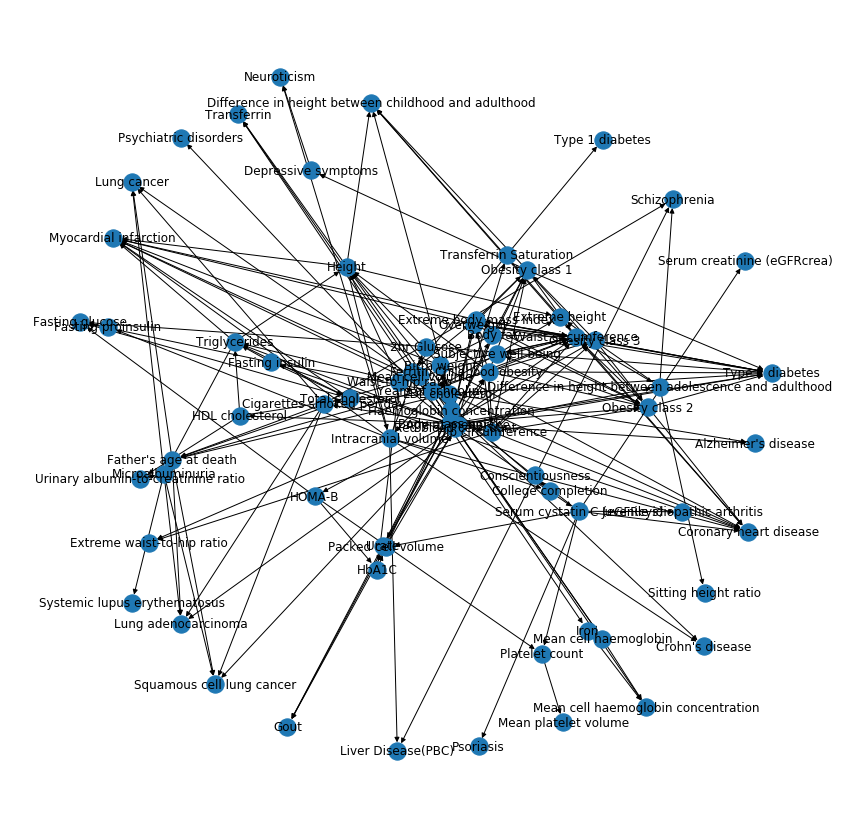

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
layout = nx.spring_layout(BfsBmiG)
nx.draw_networkx(BfsBmiG, ax=ax, with_labels=True, pos=layout)
ax.set_axis_off()

---

### Propagate `HealthG` from `Body mass index` node by a factor of  `10`

In [60]:
props = propagate(HealthG, "Body mass index", 10)

In [61]:
props

{'Gout': {'activation': 31.70823614661036},
 'Schizophrenia': {'activation': 31173.460940439356},
 'Type 2 diabetes': {'activation': 20338.37471330177},
 'Juvenile idiopathic arthritis': {'activation': 3.793333975721797},
 'Psoriasis': {'activation': 4.065000430036394},
 'Liver Disease(PBC)': {'activation': 45197.18724295845},
 'Systemic lupus erythematosus': {'activation': 2982.5957326343428},
 'Type 1 diabetes': {'activation': 20.60913282391436},
 "Alzheimer's disease": {'activation': 8558.635585320304},
 "Crohn's disease": {'activation': 21926.70821706709},
 'Coronary heart disease': {'activation': 11087.048307396964},
 'Melanoma': {'activation': 1},
 'Myocardial infarction': {'activation': 4539.073071648227},
 'Psychiatric disorders': {'activation': 65.80582617469665},
 'Pancreatic cancer': {'activation': 1},
 'Lung adenocarcinoma': {'activation': 118.50103058488654},
 'Lung cancer': {'activation': 4243.847878464354},
 'Squamous cell lung cancer': {'activation': 156.57531147501578}

### Check that Propagation update is _Consistent_

In [62]:
bfs_hg = BFS(HealthG)
is_propagation_consistent(iter(bfs_hg('Body mass index')))

True

🎉

---

### Let's Update the `HealthG` graph with results of propagation

In [63]:
nx.set_node_attributes(HealthG, props)

In [64]:
list(HealthG.nodes(data='activation'))

[('Gout', 31.70823614661036),
 ('Schizophrenia', 31173.460940439356),
 ('Type 2 diabetes', 20338.37471330177),
 ('Juvenile idiopathic arthritis', 3.793333975721797),
 ('Psoriasis', 4.065000430036394),
 ('Liver Disease(PBC)', 45197.18724295845),
 ('Systemic lupus erythematosus', 2982.5957326343428),
 ('Type 1 diabetes', 20.60913282391436),
 ("Alzheimer's disease", 8558.635585320304),
 ("Crohn's disease", 21926.70821706709),
 ('Coronary heart disease', 11087.048307396964),
 ('Melanoma', 1),
 ('Myocardial infarction', 4539.073071648227),
 ('Psychiatric disorders', 65.80582617469665),
 ('Pancreatic cancer', 1),
 ('Lung adenocarcinoma', 118.50103058488654),
 ('Lung cancer', 4243.847878464354),
 ('Squamous cell lung cancer', 156.57531147501578),
 ('Depressive symptoms', 3306.141150467376),
 ('Years of schooling', 17828.29293887995),
 ('Mean platelet volume', 0.2906492901842216),
 ('Neuroticism', 5527.649493776675),
 ('Platelet count', 12.95964494030818),
 ('Subjective well being', 12745.8520

### Analysis on Unchanged Nodes w.r.t. SCC $\in$ `HealthG`

In [65]:
nodes_unchanged = list(filter(lambda n: n[1] == 1, HealthG.nodes(data='activation')))
for (node, activation) in nodes_unchanged:
    print('Node: {}({}) - \n In-Nodes: {}; \n Out-Nodes: {}'.format(node, activation, 
                                                                    list(HealthG.predecessors(node)), 
                                                                    list(HealthG.successors(node))))

Node: Melanoma(1) - 
 In-Nodes: ['Corrected insulin response']; 
 Out-Nodes: []
Node: Pancreatic cancer(1) - 
 In-Nodes: ['C-reactive protein']; 
 Out-Nodes: []
Node: C-reactive protein(1) - 
 In-Nodes: []; 
 Out-Nodes: ['Pancreatic cancer']
Node: Zinc(1) - 
 In-Nodes: []; 
 Out-Nodes: ['Mean cell volume']
Node: Sleep duration(1) - 
 In-Nodes: []; 
 Out-Nodes: ['Years of schooling']
Node: Corrected insulin response(1) - 
 In-Nodes: []; 
 Out-Nodes: ['Birth weight', 'Body mass index', 'HbA1C', 'Melanoma', 'Type 2 diabetes']


In [66]:
sccs = nx.strongly_connected_components(HealthG)
largest_scc = max(sccs, key=len)

In [67]:
largest_scc

{'2hr Glucose',
 'Age at menarche',
 'Birth weight',
 'Body fat',
 'Body mass index',
 'Childhood obesity',
 'Cigarettes smoked per day',
 'College completion',
 'Conscientiousness',
 'Difference in height between adolescence and adulthood',
 'Difference in height between childhood and adulthood',
 'Extreme body mass index',
 'Extreme height',
 'Extreme waist-to-hip ratio',
 'Fasting glucose',
 'Fasting insulin',
 'Fasting proinsulin',
 "Father's age at death",
 'Ferritin',
 'HDL cholesterol',
 'HOMA-B',
 'Haemoglobin concentration',
 'HbA1C',
 'Height',
 'Hip circumference',
 'Intracranial volume',
 'Iron',
 'LDL cholesterol',
 'Mean cell haemoglobin',
 'Mean cell haemoglobin concentration',
 'Mean cell volume',
 'Microalbuminuria',
 'Obesity class 1',
 'Obesity class 2',
 'Obesity class 3',
 'Overweight',
 'Packed cell volume',
 'Red blood cell count',
 'Serum creatinine (eGFRcrea)',
 'Serum cystatin C (eGFRcys)',
 'Sitting height ratio',
 'Subjective well being',
 'Total cholesterol

In [68]:
# Any unchanged node IN largest SCC??

list(filter(lambda n: n in largest_scc, nodes_unchanged))

[]

### So no `unchaged node` is IN the largest SCC! Good! 🤓

## Save the Graph in JSON

#### (Same format)

In [69]:
from networkx import json_graph

In [70]:
export_json = nx.json_graph.node_link_data(HealthG)

In [71]:
export_json.keys()

dict_keys(['directed', 'multigraph', 'graph', 'nodes', 'links'])

In [72]:
export_json['multigraph']

False

In [73]:
export_json['nodes']

[{'activation': 31.70823614661036,
  'group': 7,
  'id': 'Gout',
  'shortName': 'Gout'},
 {'activation': 31173.460940439356,
  'group': 9,
  'id': 'Schizophrenia',
  'shortName': 'Schizophrenia'},
 {'activation': 20338.37471330177,
  'group': 7,
  'id': 'Type 2 diabetes',
  'shortName': 'Diabetes(T2)'},
 {'activation': 3.793333975721797,
  'group': 7,
  'id': 'Juvenile idiopathic arthritis',
  'shortName': 'Arthritis(JIA)'},
 {'activation': 4.065000430036394,
  'group': 7,
  'id': 'Psoriasis',
  'shortName': 'Psoriasis'},
 {'activation': 45197.18724295845,
  'group': 7,
  'id': 'Liver Disease(PBC)',
  'shortName': 'Liver Disease(PBC)'},
 {'activation': 2982.5957326343428,
  'group': 7,
  'id': 'Systemic lupus erythematosus',
  'shortName': 'Lupus(SLE)'},
 {'activation': 20.60913282391436,
  'group': 7,
  'id': 'Type 1 diabetes',
  'shortName': 'Diabetes(T1)'},
 {'activation': 8558.635585320304,
  'group': 7,
  'id': "Alzheimer's disease",
  'shortName': "Alzheimer's"},
 {'activation': 

In [74]:
export_json['links']

[{'color': 'red',
  'id': 1,
  'source': 'Depressive symptoms',
  'target': 'Neuroticism',
  'value': 1.8155},
 {'color': 'blue',
  'id': 2,
  'source': 'Years of schooling',
  'target': "Alzheimer's disease",
  'value': -1.0419},
 {'color': 'blue',
  'id': 3,
  'source': 'Years of schooling',
  'target': 'Body mass index',
  'value': -1.4145},
 {'color': 'blue',
  'id': 4,
  'source': 'Years of schooling',
  'target': 'Childhood obesity',
  'value': -1.1203},
 {'color': 'red',
  'id': 5,
  'source': 'Years of schooling',
  'target': 'College completion',
  'value': 5.1019},
 {'color': 'red',
  'id': 6,
  'source': 'Years of schooling',
  'target': "Crohn's disease",
  'value': 1.8066},
 {'color': 'blue',
  'id': 7,
  'source': 'Years of schooling',
  'target': 'Depressive symptoms',
  'value': -2.2895},
 {'color': 'red',
  'id': 8,
  'source': 'Years of schooling',
  'target': 'Intracranial volume',
  'value': 1.1155},
 {'color': 'blue',
  'id': 9,
  'source': 'Years of schooling',
  

#### Dump the JSON object

In [75]:
json.dump(export_json, open('../startup/playable_health_v5_propagation_bmi.json', 'w'))

In [76]:
!ls ../startup/

__pycache__                             playable_health_v5_propagation_bmi.json
init_values.py                          propagation_lookups.py
playable_health_v5.json


# That's all folks!  🤘🚀

---